# シグナルとバックグラウンドが混在するヒストグラムでのフィッティング
ガウス分布するシグナルとexp的に変化するバックグランドが存在するヒストグラムでのフィッティングの一例。  
最初から全パラメータを宇賀化してフィッティングしようとすると失敗することが多いので以下のようにシグナル、  
バックグラウンドの領域ごとにフィッティングを行いそこから得られたパラメータを初期値として全体のフィットをすると  
うまくいくことが多い。

ヒストグラムが保存されているファイルを開く

In [1]:
auto f = new TFile("sample.root")

(TFile *) 0x7f9dc52a89f0


ヒストグラムを読み込む。

In [2]:
auto h = (TH1D*) f->Get("h")

(TH1D *) 0x7f9dc5c721c0


In [3]:
auto c = new TCanvas()

(TCanvas *) 0x7f9dc5c85990


ヒストグラムは次のような分布をしている。

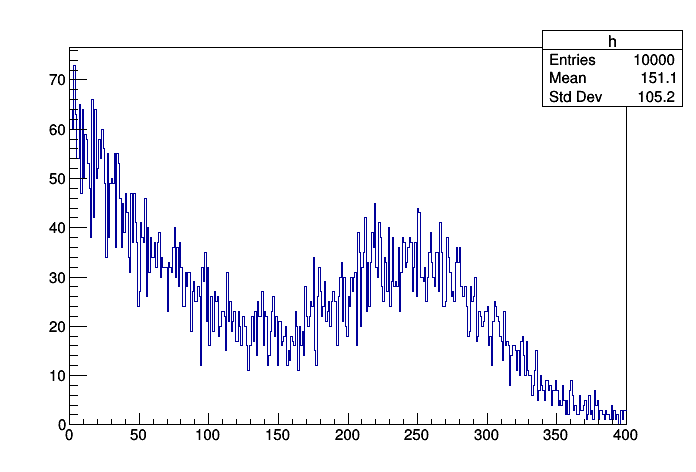

In [4]:
c->Draw();
h->Draw();
c->Update();

シグナル、バックグラウンド、シグナル+バックグラウンドの関数を定義する。

In [5]:
auto fs = new TF1("sig","gausn",0,400);
auto fb = new TF1("bg","expo",0,400);
auto fsb = new TF1("sb","gausn(0)+expo(3)",0,400);

まずバックグラウンド部分の関数の大まかなパラメータを初期値として入力。  
SetParameters()は関数のパラメータをセットする。  
```c++
SetParameters(par[0],par[1],par[2],...,par[n]);
```
expは2パラメータ$$exp(par[0]+par[1]*x)$$で定義されている。

In [6]:
fb->SetParameters(50,-0.01);

In [7]:
h->Fit("bg","","",0,100)

 FCN=114.901 FROM MIGRAD    STATUS=CONVERGED      49 CALLS          50 TOTAL
                     EDM=6.15629e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.11937e+00   2.88553e-02   8.37261e-05   2.20264e-03
   2  Slope       -9.67549e-03   5.71905e-04   1.65946e-06   9.13819e-02
(TFitResultPtr) <nullptr TFitResult>


0-100の領域をバックグランド関数でフィットした様子。

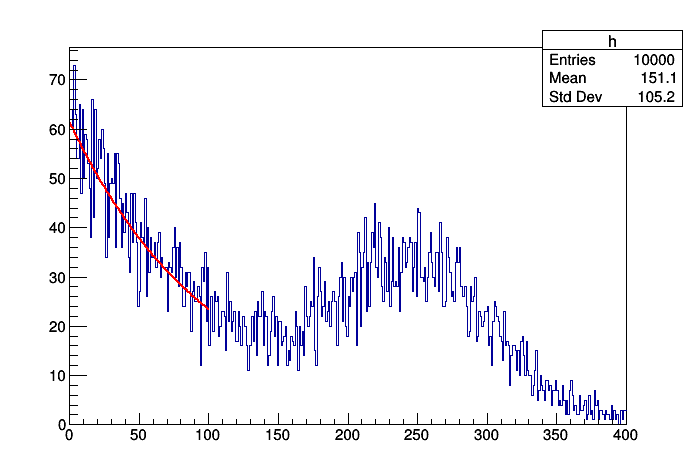

In [9]:
h->Draw();
c->Draw();

シグナル領域をシグナル関数でフィットする。  
SetParameters()でおおよその初期値をセット。  
gausnは規格化されたガウス関数で
$$
g(x) = \frac{Y}{\sqrt{2\pi}\sigma}exp(-\frac{(x-m)^2}{2\sigma^2})
$$
SetParameters(Y,m,$\sigma$)と定義すれば良い。  

補足  
もし規格化されていないガウス関数を使いたければgausとすればよい。

In [10]:
fs->SetParameters(300,250,40);

In [11]:
h->Fit("sig","","",200,300)

 FCN=99.3802 FROM MIGRAD    STATUS=CONVERGED     127 CALLS         128 TOTAL
                     EDM=7.41753e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.95656e+03   3.78651e+02   4.47958e-01   3.86502e-06
   2  Mean         2.41765e+02   2.80588e+00   1.15363e-02   9.05297e-05
   3  Sigma        6.00894e+01   5.51314e+00   5.87286e-05  -2.52501e-02
(TFitResultPtr) <nullptr TFitResult>


200-300をシグナル関数でフィットした様子。

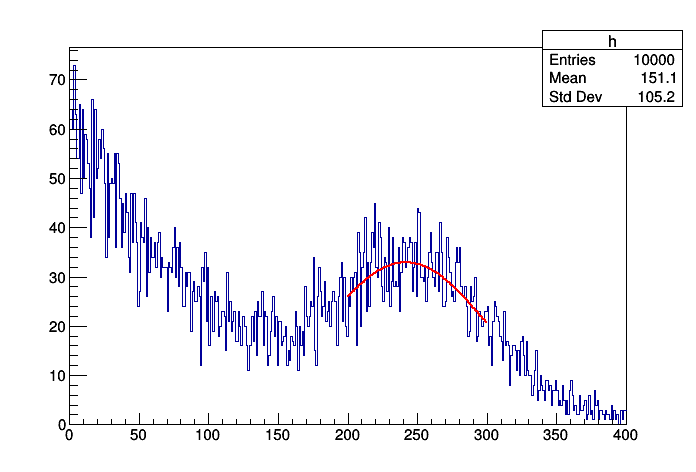

In [12]:
h->Draw();
c->Draw();

それぞれのフィッティングで得られたパラメータを初期値として改めて全領域をシグナル+バックグラウンド関数でフィットする。  
GetParameter()でパラメータをとってくることができる。  


In [13]:
double par[5] = {fs->GetParameter(0),fs->GetParameter(1),fs->GetParameter(2),
                fb->GetParameter(0),fb->GetParameter(1)};


In [14]:
fsb->SetParameters(par[0],par[1],par[2],par[3],par[4]);


In [15]:
h->Fit("sb","","",0,400)

 FCN=403.361 FROM MIGRAD    STATUS=CONVERGED     152 CALLS         153 TOTAL
                     EDM=2.70797e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.53743e+03   1.26299e+02   6.71138e-01   1.12821e-06
   2  p1           2.49514e+02   1.31439e+00   1.09467e-02  -4.79024e-04
   3  p2           4.99198e+01   1.38027e+00   8.71316e-03  -6.59296e-04
   4  p3           4.13634e+00   2.45079e-02   1.36024e-04   1.19443e-02
   5  p4          -1.01350e-02   3.92158e-04   1.46884e-06  -4.20857e-04
(TFitResultPtr) <nullptr TFitResult>


全領域をフィットした様子。

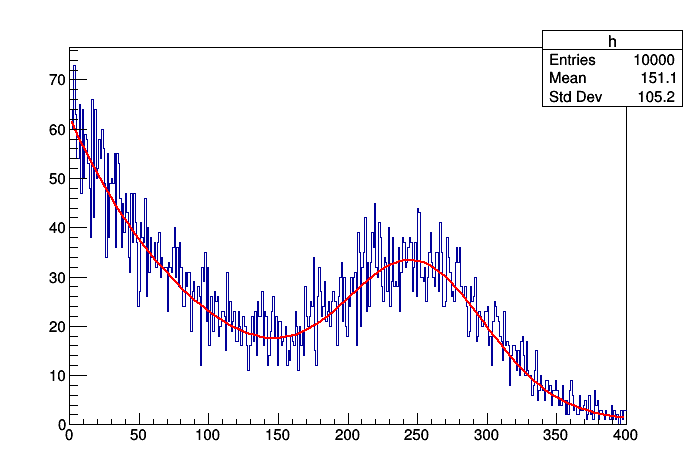

In [16]:
h->Draw();
c->Draw();